In [1]:
%%HTML
<style>
.container { width:100% } 
</style>

# Gradient Ascent

The function `find_maximum` that is defined below takes four arguments:
- `f` is a function of the form $\texttt{f}: \mathbb{R}^n \rightarrow \mathbb{R}$.
   It is assumed that the function `f` is <font color="blue">convex</font> and  therefore there is only one      global maximum. 
- `gradF` is the gradient of the function `f`.
- `start` is a `numpy` array of numbers that is used to start the search for a maximum.
- `eps` is a small floating point number.  This number controls the precision.
  If the values of `f` change less than `eps`, then the algorithm stops.

The function `find_maximum` returns a triple of values of the form
$$ (x_{max}, \texttt{fx}, \texttt{cnt}) $$
<ol>
    <li>$x_{max}$ is the position  of the maximum,</li>
    <li>$\texttt{fx}$ is equal to $\texttt{f}(x_{max})$,</li>
    <li>$\texttt{cnt}$ is the number of iterations.</li>
</ol>

The algorithms computes a sequence $(x_n)_n$ that is defined inductively:
<ol>
    <li>$x_0 := \texttt{start}$,</li>
    <li>$x_{n+1} := x_n + \alpha \cdot \nabla f(x_n)$.</li>
</ol>

The algorithm given below adjusts the <font color="blue">learning rate</font> $\alpha$ dynamically: If $f(x_{n+1}) > f(x_n)$, then the learning rate alpha is increased by a factor of $1.2$.  Otherwise, the learning rate is decreased by a factor of $\frac{1}{2}$.  This way, the algorithm determines the optimal learning rate by itself.

In [2]:
def findMaximum(f, gradF, start, eps):
    x     = start
    fx    = f(x)
    alpha = 1.0   # learning rate
    cnt   = 0     # number of iterations
    while True:
        cnt += 1
        xOld, fOld = x, fx
        x  += alpha * gradF(x)
        fx  = f(x)
        print(f'cnt = {cnt}, f({x}) = {fx}')
        print(f'gradient = {gradF(x)}')
        if abs(x - xOld) <= abs(x) * eps:
            return x, fx, cnt            
        if fx <= fOld:    # f has not increased, learning rate too high
            alpha *= 0.5
            print(f'decrementing: alpha = {alpha}')
            x, fx = xOld, fOld
            continue
        else:             # f has increased
            alpha *= 1.2
            print(f'incrementing: alpha = {alpha}')

In [3]:
import numpy as np

We will try to find the maximum of the function
$$ f(x) := \sin(x) - \frac{x^2}{2} $$

In [4]:
def f(x):
    return np.sin(x) - x**2 / 2

Let us plot this function.

In [5]:
import matplotlib.pyplot as plt
import seaborn           as sns

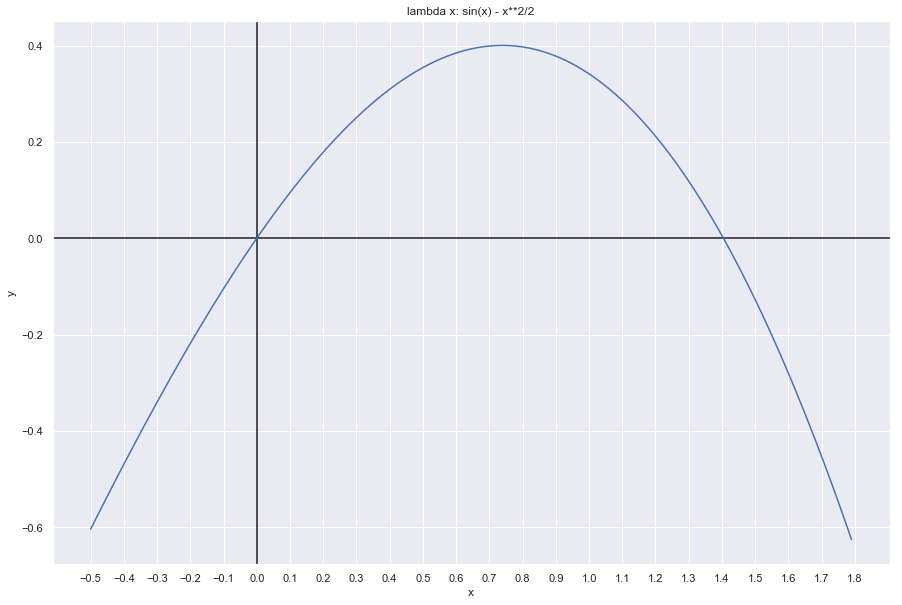

In [6]:
X = np.arange(-0.5, 1.8, 0.01)
Y = f(X)
plt.figure(figsize=(15, 10))
sns.set(style='darkgrid')
plt.title('lambda x: sin(x) - x**2/2')
plt.axvline(x=0.0, c='k')
plt.axhline(y=0.0, c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(-0.5, 1.81, step=0.1))
plt.plot(X, Y, color='b')

Clearly, this function has a maximum somewhere between 0.7 and 0.8.  Let us use gradient ascent to find it.  In order to do so, we have to provide the derivative of this function.  We have
$$ \frac{\mathrm{d}f}{\mathrm{d}x} = \cos(x) - x. $$

In [7]:
def fs(x):
    return np.cos(x) - x

Let us plot the derivative together with the function.

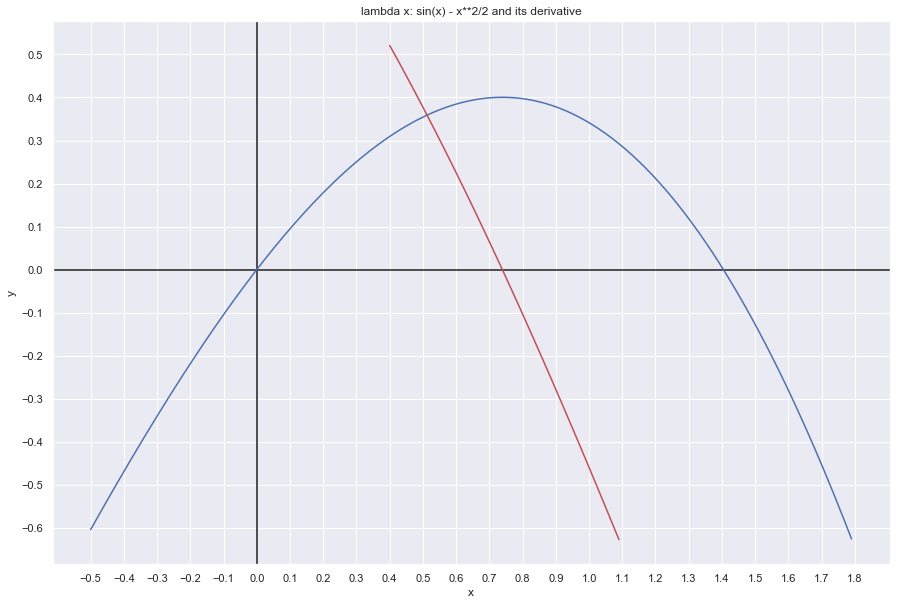

In [8]:
X2 = np.arange(0.4, 1.1, 0.01)
Ys = fs(X2)
plt.figure(figsize=(15, 10))
sns.set(style='darkgrid')
plt.title('lambda x: sin(x) - x**2/2 and its derivative')
plt.axvline(x=0.0, c='k')
plt.axhline(y=0.0, c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(-0.5, 1.81, step=0.1))
plt.yticks(np.arange(-0.6, 0.61, step=0.1))
plt.plot(X, Y, color='b')
plt.plot(X2, Ys, color='r')

In [9]:
x_max, _, _ = findMaximum(f, fs, 0.0, 1e-15)

cnt = 1, f(1.0) = 0.3414709848078965
gradient = -0.45969769413186023
incrementing: alpha = 1.2
cnt = 2, f(0.4483627670417677) = 0.3329761246927296
gradient = 0.4527952680626408
decrementing: alpha = 0.6
cnt = 3, f(0.7241813835208839) = 0.40030314845680465
gradient = 0.02486064118885567
incrementing: alpha = 0.72
cnt = 4, f(0.74208104517686) = 0.4004810980605904
gradient = -0.0050173081011656295
incrementing: alpha = 0.864
cnt = 5, f(0.7377460909774529) = 0.40048711198748876
gradient = 0.0022403743247311203
incrementing: alpha = 1.0368
cnt = 6, f(0.7400689110773342) = 0.4004878021194608
gradient = -0.0016468200075295814
incrementing: alpha = 1.24416
cnt = 7, f(0.7380200034967662) = 0.40048766290474
gradient = 0.0017821945271920825
decrementing: alpha = 0.62208
cnt = 8, f(0.7390444572870501) = 0.4004886107288656
gradient = 6.807511115669573e-05
incrementing: alpha = 0.7464959999999999
cnt = 9, f(0.7390952750852282) = 0.400488612027307
gradient = -1.6973593753633054e-05
incrementing: alph

In [10]:
x_max

0.7390851349820259

The maximum seems to be at $x \approx 0.739085$.  Let's check the derivative at this position.

In [11]:
fs(x_max)

-2.9570469406436928e-09